In [1]:
import pandas as pd
import glob

In [2]:
# Tentukan path ke folder dataset
folder_path = 'Dataset/'

# Buat pola untuk mencocokkan file CSV di dalam folder
file_pattern = '*.csv'

# Gunakan modul glob untuk mendapatkan daftar file yang sesuai dengan pola
file_list = glob.glob(folder_path + file_pattern)

# Buat list kosong untuk menyimpan DataFrame dari setiap file CSV
dfs = []

# Loop melalui setiap file dan baca sebagai DataFrame, lalu tambahkan ke list
for file in file_list:
    df = pd.read_csv(file, sep=";")
    dfs.append(df)

# Gabungkan semua DataFrame menjadi satu
merged_df = pd.concat(dfs, ignore_index=True)

In [3]:
# # Mencari nilai yang mengandung kata 'mrk' dalam kolom 'full_text'
# result_df = df[df['full_text'].str.contains('mrk')]

# # Tampilkan hasilnya
# for i in result_df['full_text'].to_numpy() :
#     print(i)

In [4]:
merged_df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Oct 20 23:59:50 +0000 2023,1715518217446420971,"Buka Suara, Presiden RI Jokowi Mengecam Keras ...",0,0,0,1,in,1695702905268178944,1715518217446420971,summerrain_d,https://twitter.com/summerrain_d/status/171551...
1,Fri Oct 20 23:59:40 +0000 2023,1715518176870744332,Kini Palestina memanggil berikanlah Mereka kek...,0,0,0,1,in,779355956069085184,1715518176870744332,riatul_HN,https://twitter.com/riatul_HN/status/171551817...
2,Fri Oct 20 23:59:18 +0000 2023,1715518081408151615,kalau perang Palestina mereka manfaat cari uan...,0,0,0,0,in,1300513006455910400,1715518081408151615,Rani34079287,https://twitter.com/Rani34079287/status/171551...
3,Fri Oct 20 23:59:17 +0000 2023,1715518079885807813,@Marie18909292 @DeHoutman_id Lu samperin aj ke...,0,2,0,0,in,50633077,1715325471670653407,muthijairoi,https://twitter.com/muthijairoi/status/1715518...
4,Fri Oct 20 23:59:02 +0000 2023,1715518014467268645,@Hilmi28 Hamas tidak mewakili rakyat palestina...,0,0,0,0,in,1658871216852303876,1715365067867504759,tjahjadoel90,https://twitter.com/tjahjadoel90/status/171551...


In [5]:
# Check for NaN values
nan_values = merged_df.isna().sum()

# Display the count of NaN values for each column
print(nan_values)

created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64


<h3><b>Preprocessing

In [6]:
import re
from nltk.corpus import  stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_tag(text):
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if not word.startswith('#')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('@')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('http')]  # Menghapus kata-kata yang dimulai dengan '#'
    filtered_words = [word for word in filtered_words if not word.startswith('https')]  # Menghapus kata-kata yang dimulai dengan '#'
    return ' '.join(filtered_words)

# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    text = text.lower()
    hasil = re.sub(r'[^\w\s]', '', text)
    return hasil

def ubah_angka(text):
    text = text.lower()
    # Menggunakan regular expression untuk mengganti karakter alay
    teks_benar = re.sub(r'3', 'e', text)
    teks_benar = re.sub(r'4', 'a', teks_benar)
    teks_benar = re.sub(r'1', 'i', teks_benar)
    teks_benar = re.sub(r'0', 'o', teks_benar)
    return teks_benar

def remove_number(text) :
    hasil = re.sub(r'\d', '', text)
    return hasil

# Fungsi untuk menghapus tautan dari teks
def remove_links(text):
    text = text.lower()
    # Menggunakan ekspresi reguler untuk mencari dan menghapus tautan
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return re.sub(r'https\S+|www\S+|https\S+', '', text)

# Fungsi untuk mengganti singkatan dengan nilai sesuai dari kamus
def ganti_singkatan(text):
    text = text.lower()
    # Baca kamus slangword dari file teks
    slangword_path = 'kbba.txt'
    with open(slangword_path, 'r') as file:
        slangword_dict = dict(line.strip().split(':') for line in file)

    words = text.split()
    for i, word in enumerate(words):
        if word in slangword_dict:
            words[i] = slangword_dict[word]
    return ' '.join(words)

# remove english stopwords function
def remove_stopwords(text):
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

def stopwords_indo(text):
    text = text.lower()
    stop_factory = StopWordRemoverFactory()
    more_stopword = ['dengan', 'ia','bahwa','oleh']
    data = stop_factory.get_stop_words()+more_stopword
    stopword = stop_factory.create_stop_word_remover()
    return stopword.remove(text)

def stemming(text):
    text = text.lower()
    Fact = StemmerFactory()
    Stemmer = Fact.create_stemmer()
    return Stemmer.stem(text)

# Fungsi untuk menghapus kata-kata dengan satu huruf
def remove_single_letter_words(text):
    text = re.sub(r'\b\w\b', '', text)
    
    hapus = ['id','amp','deh','tanyakanrl','sih','na','si','rj','lc','ar','oe','al','sm','ri','en','ar','mc','vt','rob','ny','dc','az','va']
    words = text.split()

    # Memfilter kata-kata yang tidak ada dalam array yang akan dihapus
    kata_kata_tanpa_kata_yang_dihapus = [kata for kata in words if kata not in hapus]

    # Menggabungkan kata-kata yang tersisa menjadi kalimat baru
    kalimat_tanpa_kata_yang_dihapus = ' '.join(kata_kata_tanpa_kata_yang_dihapus)
    return kalimat_tanpa_kata_yang_dihapus


# Preprocessing kolom 'text'
merged_df['full_text'] = merged_df['full_text'].apply(ganti_singkatan)
merged_df['full_text'] = merged_df['full_text'].apply(remove_punctuation)
merged_df['full_text'] = merged_df['full_text'].apply(remove_tag)
merged_df['full_text'] = merged_df['full_text'].apply(ubah_angka)
merged_df['full_text'] = merged_df['full_text'].apply(remove_number)
merged_df['full_text'] = merged_df['full_text'].apply(remove_links)
merged_df['full_text'] = merged_df['full_text'].apply(remove_stopwords)
merged_df['full_text'] = merged_df['full_text'].apply(stopwords_indo)
# merged_df['full_text'] = merged_df['full_text'].apply(stemming)
merged_df['full_text'] = merged_df['full_text'].apply(remove_single_letter_words)

# Menampilkan DataFrame setelah preprocessing
merged_df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Fri Oct 20 23:59:50 +0000 2023,1715518217446420971,buka suara presiden jokowi mengecam keras tind...,0,0,0,1,in,1695702905268178944,1715518217446420971,summerrain_d,https://twitter.com/summerrain_d/status/171551...
1,Fri Oct 20 23:59:40 +0000 2023,1715518176870744332,kini palestina memanggil berikanlah kekuatan t...,0,0,0,1,in,779355956069085184,1715518176870744332,riatul_HN,https://twitter.com/riatul_HN/status/171551817...


In [7]:
merged_df['full_text'][10]

'zidnsptra memelord_ mantap saudara lakilaki dukung berangkat palestina gabung hamas katanya kekurangan suicide squad'

In [8]:
merged_df.shape

(4418, 12)

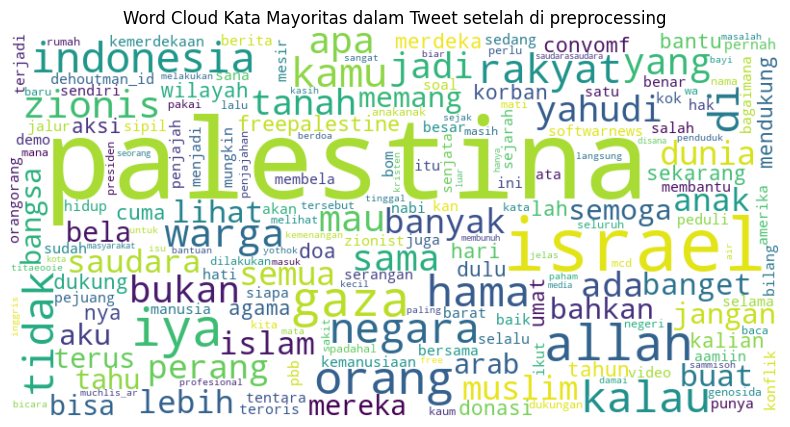

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tes = merged_df['full_text'].to_list()
# Menggabungkan semua kata dalam kolom tweet
all_words = ' '.join(tes)

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, collocations=False, background_color='white').generate(all_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Mayoritas dalam Tweet setelah di preprocessing')
plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
text = merged_df['full_text']
text_list =  [i.split() for i in text]

In [12]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [13]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<2660 unique tokens: ['buka', 'freepalestine', 'gaza', 'indonesia', 'israelterorrist']...>


In [14]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

4418
[(61, 1), (142, 1), (169, 4), (436, 1), (528, 1), (688, 1), (689, 1), (690, 1), (691, 1), (692, 2), (693, 1), (694, 1), (695, 1)]


In [15]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

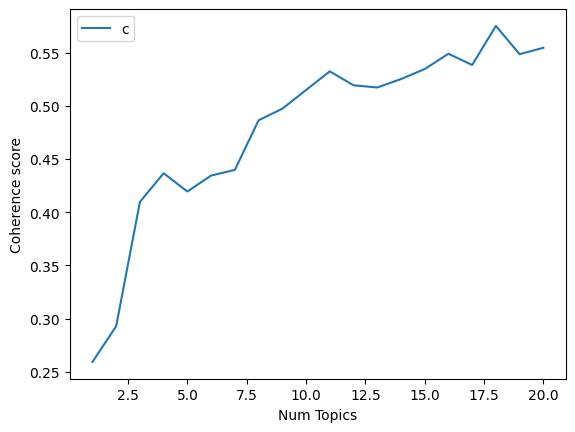

In [16]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.259265
Num Topics = 2  has Coherence Value of 0.292871
Num Topics = 3  has Coherence Value of 0.409638
Num Topics = 4  has Coherence Value of 0.436565
Num Topics = 5  has Coherence Value of 0.419383
Num Topics = 6  has Coherence Value of 0.434408
Num Topics = 7  has Coherence Value of 0.439689
Num Topics = 8  has Coherence Value of 0.486307
Num Topics = 9  has Coherence Value of 0.497183
Num Topics = 10  has Coherence Value of 0.514768
Num Topics = 11  has Coherence Value of 0.532323
Num Topics = 12  has Coherence Value of 0.519229
Num Topics = 13  has Coherence Value of 0.517142
Num Topics = 14  has Coherence Value of 0.525073
Num Topics = 15  has Coherence Value of 0.534457
Num Topics = 16  has Coherence Value of 0.548883
Num Topics = 17  has Coherence Value of 0.538307
Num Topics = 18  has Coherence Value of 0.575
Num Topics = 19  has Coherence Value of 0.548432
Num Topics = 20  has Coherence Value of 0.554452


In [18]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.014*"dina_sulaeman" + 0.014*"muchlis_ar" + 0.006*"hamas" + 0.006*"orang" + 0.005*"kalau" + 0.005*"indonesia" + 0.005*"kamu" + 0.005*"convomfs" + 0.005*"saudarasaudara_di" + 0.004*"apa"
Topic: 1 Word: 0.005*"perlu_menjadi" + 0.005*"gaza" + 0.005*"indonesia" + 0.004*"timur_tengah" + 0.004*"lihat_video" + 0.004*"empat_belas" + 0.004*"punya_hak" + 0.004*"warga" + 0.004*"zionis" + 0.004*"softwarnews"
Topic: 2 Word: 0.014*"cordova_media" + 0.010*"menlu_ri" + 0.010*"semoga_allah" + 0.007*"omj_jenggot" + 0.006*"lebih_baik" + 0.006*"rakyat" + 0.006*"semoga" + 0.006*"air_mata" + 0.005*"gaza" + 0.005*"zionis"
Topic: 3 Word: 0.007*"dehoutman_id" + 0.007*"yahudi_pesek" + 0.006*"allahu_akbar" + 0.006*"terima_kasih" + 0.006*"twmanado_dehoutman_id" + 0.005*"rakyat" + 0.005*"profesional" + 0.005*"yahudi" + 0.005*"hamas" + 0.005*"tanah"
Topic: 4 Word: 0.018*"iya_allah" + 0.007*"allah" + 0.006*"umat_islam" + 0.006*"umat_muslim" + 0.005*"iya" + 0.004*"muchlis_ar" + 0.004*"islam" + 0.004*"